# A9: K-Nearest Neighbors
Alex Dien
11/14/22

# Table of Contents

>[A9: K-Nearest Neighbors](#scrollTo=Hk0FF9Wsr-KO)

>[Table of Contents](#scrollTo=mo2g0z7dtnWo)

>[Task 1 - Data Import and Summaries](#scrollTo=qsR-rr7MsX4U)

>>>[A. Import packages](#scrollTo=5YQ09-P_uuxC)

>>>[B. Data import](#scrollTo=CY13OGHlu7cx)

>>>[C. Show the overall structure and summary of the data frame using info() describe() head()](#scrollTo=B3xLanRGxvlV)

>>>[D. Drop the cabin column from the dataset.](#scrollTo=aFlMz8HUIKHJ)

>[Task 2 - Standardize the data](#scrollTo=Dc1iMMD8sdIs)

>>[Using StandardScaler fit and transform the data](#scrollTo=hbvWhC2UvhEz)

>>[Show the head of the scaled dataframe](#scrollTo=47TwDd7dnYTn)

>[Task 3 - Elbow Method](#scrollTo=ZdAY1o-crYDv)

>>[Use the elbow method to determine the optimal number of clusters. (use clusters 1 through 20)](#scrollTo=nta4V8mfrlUG)

>>>[Run a for loop to create a list with the inertia results for the 20 cluster combinations (see tutorial code)](#scrollTo=clEO1BohsVnD)

>>>[In a text block explain the best number of clusters based on the elbow method. If it's unclear which cluster is best make your best argument why you chose the number you chose.](#scrollTo=ojo261fC8zy9)

>[Task 4 - Kmeans](#scrollTo=oQgf00QvYLCK)

>>>[Fit and predict with a KMeans cluster object to your data using the best cluster option shown in Task 3 (i.e. if the elbow method showed that 6 clusters is best create a KMeans object with clusters set to 6.)](#scrollTo=e1GhnEFEi-bc)

>>>[Put the results (predicted clusters) into your existing dataframe in a new column called 'predicted_cluster'](#scrollTo=GE693Lbu1Juz)

>[Task 4B - Scatterplot](#scrollTo=ojegAqZQoML9)

>>[Create TWO graphs using the following method. These graphs should each show different column results](#scrollTo=kbxtSk7GoRVZ)

>>[1.1 Using seaborn to visualize the results of your clustering for by using a scatter plot, choose two columns (your choice as to which two) and highlight the points using the predicted_clusters column.](#scrollTo=2PXSRVJmoZAn)

>>[1.2 Add a title, and axis labels to your plot to describe the plot](#scrollTo=kSJh8llkoejG)

>>[1.3 In a text box below describe how well separated the clusters are by these two variables. Is there a lot of overlap or are there clear clusters and good separation between clusters? Do any particular clusters stand out as particularly unique in the boxplot?](#scrollTo=nsmmkTRMojoD)

>[Task 4C - Boxplot](#scrollTo=1PjvY40XhUfg)

>>[1.1 Create a 2 boxplots grouped by cluster. You choose which columns to explore. They CANNOT be columns you used in the scatter plot.](#scrollTo=SpH-NhKwqv_9)

>>[1.2 In a textbox describe the separation the clustering achieved for each of these features. Are the boxplots overlapping? Which two clusters are the most dissimilar based on these two features. Which are the most similar?](#scrollTo=vkJ4Cdmmq0M9)

>[Task 5 - PCA](#scrollTo=mT1xBvRAqpzK)

>>[Fit and transform our scaled data using a PCA object using 3 dimensions on our scaled dataframe.](#scrollTo=IjvZ5epkrgXJ)

>>[Save the results in a new dataframe.](#scrollTo=nW1EfxuYrlXc)

>>[Explain how many dimensions we have reduced our dataset from.](#scrollTo=nSqrfQG7rl_e)

>>[Sum up the explained variance and show the total. How much variance in our dataset do only 3 dimensions explain?](#scrollTo=qNlcBLKyrmQi)

>[Task 6 - Kmeans with PCA](#scrollTo=DlG0E7aurbN0)

>>[Fit a KMeans object to our new reduced PCA dataset](#scrollTo=gKPN53j1r0wg)

>>[Predict the cluster using the new KMeans object](#scrollTo=E3zm5JfOr4dd)

>>[Save the prediction in a 'predicted_cluster' column](#scrollTo=VDi5NCk0r44_)

>>[Plot Principal Component 1 and 2 using seaborn scatterplot and highlight/hue the predicted cluster](#scrollTo=LuAu5afvr4_v)

>>[In a text block explain if using PCA we have been more successful in visualizing the clusters than we were using our best model before applying PCA. Explain your argument well.](#scrollTo=g-eb5P9Ir5FB)

>[Mounting](#scrollTo=i47GfPbpruW0)



# Task 1 - Data Import and Summaries

### A. Import packages

In [78]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn import datasets

from sklearn.preprocessing import StandardScaler

### B. Data import

In [79]:
df = pd.read_csv("https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/titanic_cleaned.csv")

### C. Show the overall structure and summary of the data frame using info() describe() head() 

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Cabin     714 non-null    object 
 8   Embarked  714 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 50.3+ KB


In [81]:
# Show overall structure
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,714.000000,714.000000,714,714.000000,714.000000,714.000000,714.000000,714,714
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,135,4
top,NaN,NaN,male,NaN,NaN,NaN,NaN,missing,S
freq,NaN,NaN,453,NaN,NaN,NaN,NaN,529,554
mean,0.406162,2.236695,NaN,29.699118,0.512605,0.431373,34.694514,NaN,NaN
std,0.491460,0.838250,NaN,14.526497,0.929783,0.853289,52.918930,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,1.000000,NaN,20.125000,0.000000,0.000000,8.050000,NaN,NaN
50%,0.000000,2.000000,NaN,28.000000,0.000000,0.000000,15.741700,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,33.375000,NaN,NaN


In [82]:
# Summary of df
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,missing,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,missing,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,missing,S


### D. Drop the cabin column from the dataset.

In [83]:
cabin_dropped = df.drop('Cabin', axis=1)

# Task 2 - Standardize the data


## 1. Using StandardScaler fit and transform the data 


In [84]:
# Encode the df first
X = pd.get_dummies(cabin_dropped)
X.shape

(714, 12)

In [85]:
df_scaled = StandardScaler().fit_transform(X)

In [86]:
df_scaled = pd.DataFrame(df_scaled, columns=X.columns)

## 2. Show the head of the scaled dataframe



In [87]:
df_scaled.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing
0,-0.82702,0.911232,-0.530377,0.524570,-0.505895,-0.518978,-0.759051,0.759051,-0.471808,-0.202031,0.537409,-0.053
1,1.20916,-1.476364,0.571831,0.524570,-0.505895,0.691897,1.317434,-1.317434,2.119506,-0.202031,-1.860779,-0.053
2,1.20916,0.911232,-0.254825,-0.551703,-0.505895,-0.506214,1.317434,-1.317434,-0.471808,-0.202031,0.537409,-0.053
3,1.20916,-1.476364,0.365167,0.524570,-0.505895,0.348049,1.317434,-1.317434,-0.471808,-0.202031,0.537409,-0.053
4,-0.82702,0.911232,0.365167,-0.551703,-0.505895,-0.503850,-0.759051,0.759051,-0.471808,-0.202031,0.537409,-0.053


# Task 3 - Elbow Method

## 1.  Use the elbow method to determine the optimal number of clusters. (use clusters 1 through 20)


In [88]:
list(range(1, 21))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

### 2. Run a for loop to create a list with the inertia results for the 20 cluster combinations (see tutorial code)



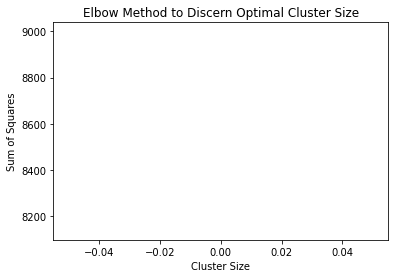

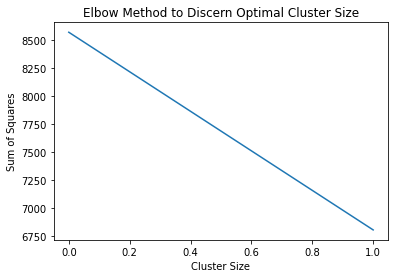

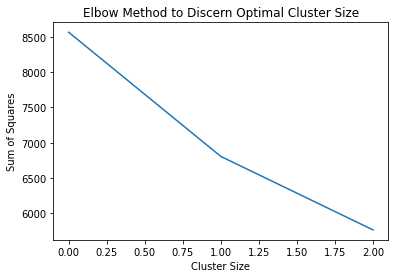

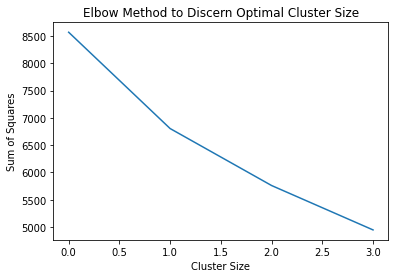

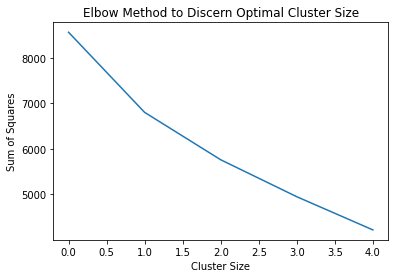

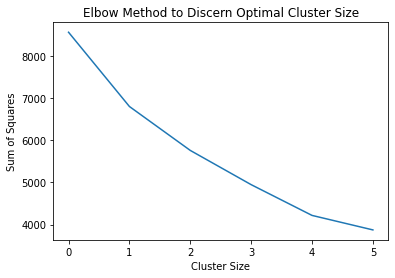

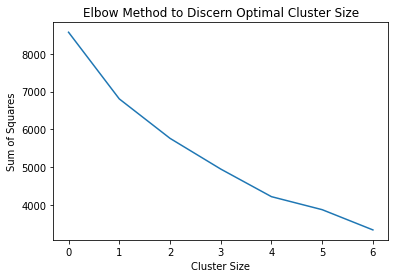

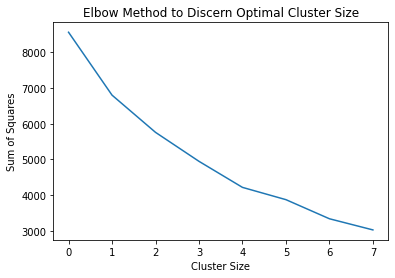

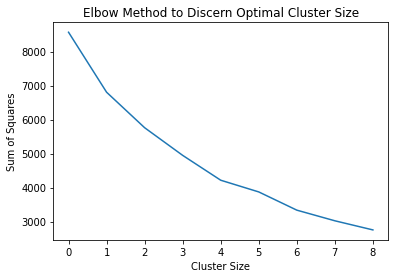

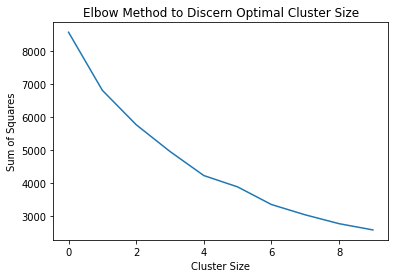

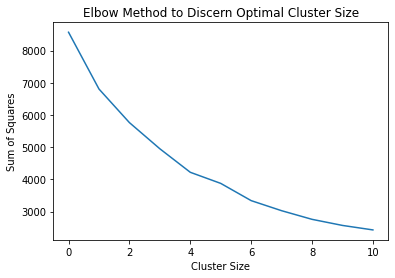

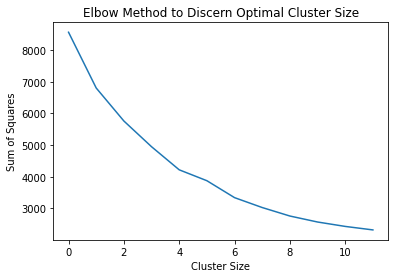

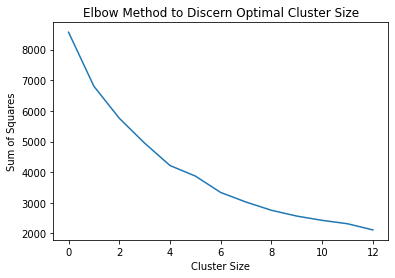

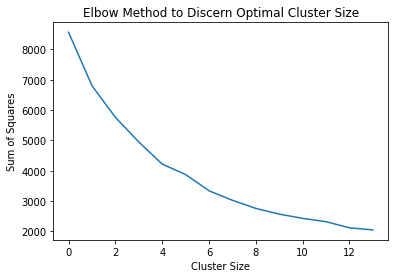

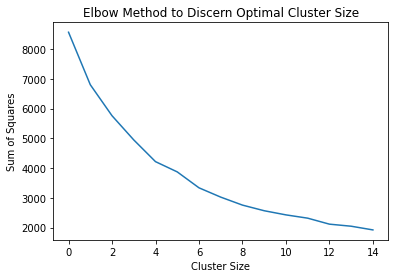

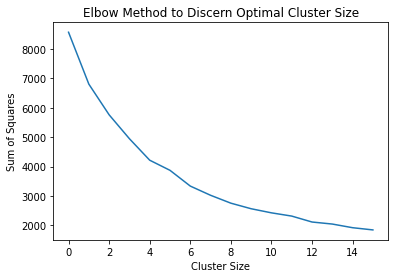

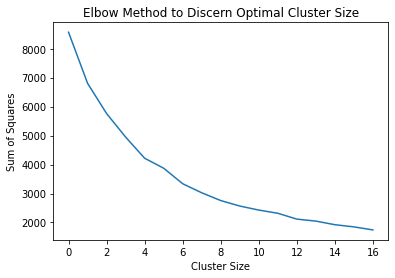

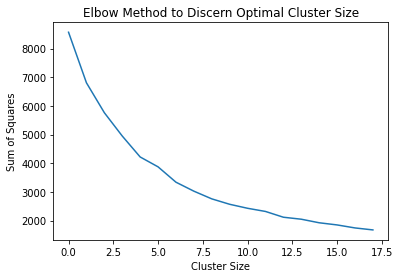

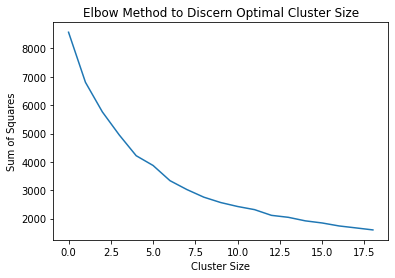

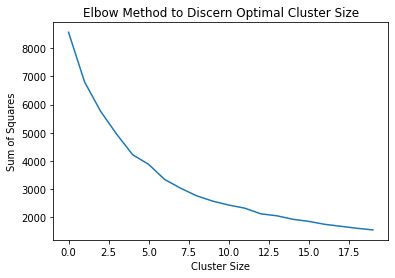

In [89]:
inertia_lst = []
model_lst = []

for i in range(1,21):
  model = KMeans(i).fit(df_scaled)
  inertia_lst.append(model.inertia_)
  model_lst.append(model)

  plt.plot(inertia_lst)
  plt.title('Elbow Method to Discern Optimal Cluster Size')
  plt.xlabel('Cluster Size')
  plt.ylabel('Sum of Squares')

  plt.show()

### 3. In a text block explain the best number of clusters based on the elbow method. If it's unclear which cluster is best make your best argument why you chose the number you chose. 


In my opinion, the best number of clusters based on the elbow method is around 6 clusters. It seems to be the sweet spot and about the point where the curve elbows out.

# Task 4 - Kmeans

### 1. Fit and predict with a KMeans cluster object to your data using the best cluster option shown in Task 3 (i.e. if the elbow method showed that 6 clusters is best create a KMeans object with clusters set to 6.)

In [90]:
kmeans_6 = KMeans(6).fit(df_scaled)

In [91]:
predicted = kmeans_6.predict(df_scaled)

In [92]:
df_scaled.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing
0,-0.82702,0.911232,-0.530377,0.524570,-0.505895,-0.518978,-0.759051,0.759051,-0.471808,-0.202031,0.537409,-0.053
1,1.20916,-1.476364,0.571831,0.524570,-0.505895,0.691897,1.317434,-1.317434,2.119506,-0.202031,-1.860779,-0.053
2,1.20916,0.911232,-0.254825,-0.551703,-0.505895,-0.506214,1.317434,-1.317434,-0.471808,-0.202031,0.537409,-0.053
3,1.20916,-1.476364,0.365167,0.524570,-0.505895,0.348049,1.317434,-1.317434,-0.471808,-0.202031,0.537409,-0.053
4,-0.82702,0.911232,0.365167,-0.551703,-0.505895,-0.503850,-0.759051,0.759051,-0.471808,-0.202031,0.537409,-0.053


### 2. Put the results (predicted clusters) into your existing dataframe in a new column called 'predicted_cluster'




In [93]:
df_scaled['predicted_cluster']=predicted

In [94]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           714 non-null    float64
 1   Pclass             714 non-null    float64
 2   Age                714 non-null    float64
 3   SibSp              714 non-null    float64
 4   Parch              714 non-null    float64
 5   Fare               714 non-null    float64
 6   Sex_female         714 non-null    float64
 7   Sex_male           714 non-null    float64
 8   Embarked_C         714 non-null    float64
 9   Embarked_Q         714 non-null    float64
 10  Embarked_S         714 non-null    float64
 11  Embarked_missing   714 non-null    float64
 12  predicted_cluster  714 non-null    int32  
dtypes: float64(12), int32(1)
memory usage: 69.9 KB


# Task 4B - Scatterplot

## 1. Create TWO graphs using the following method. These graphs should each show different column results



## 1.1 Using seaborn to visualize the results of your clustering for by using a scatter plot, choose two columns (your choice as to which two) and highlight the points using the predicted_clusters column.



## 1.2 Add a title, and axis labels to your plot to describe the plot



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


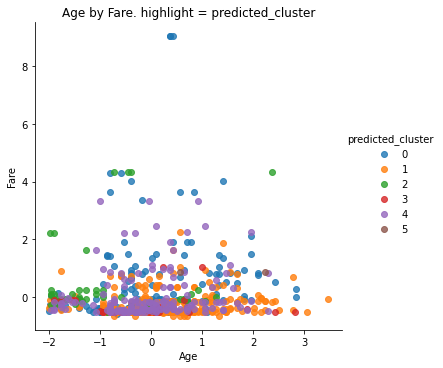

In [95]:
sns.lmplot('Age', 'Fare', data=df_scaled, hue='predicted_cluster', fit_reg=False)
plt.title('Age by Fare. highlight = predicted_cluster')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


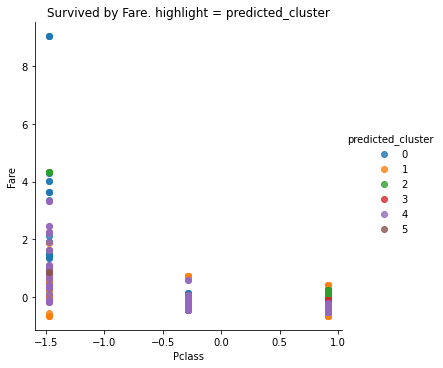

In [96]:
sns.lmplot('Pclass', 'Fare', data=df_scaled, hue='predicted_cluster', fit_reg=False)
plt.title('Survived by Fare. highlight = predicted_cluster')
plt.show()

## 1.3 In a text box below describe how well separated the clusters are by these two variables. Is there a lot of overlap or are there clear clusters and good separation between clusters? Do any particular clusters stand out as particularly unique in the boxplot?



These two variables make the scatter plot differ widely. When we use the 'Age' variable,  the data points are more scattered as opposed to the 'Pclass' variable where the data points are only on three sides and stacked. I wouldn't say any clusters stood out uniquely, because they are all spread out in a randomized pattern and it is hard to differentiate.  

# Task 4C - Boxplot

## 1.1 Create a 2 boxplots grouped by cluster. You choose which columns to explore. They CANNOT be columns you used in the scatter plot.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


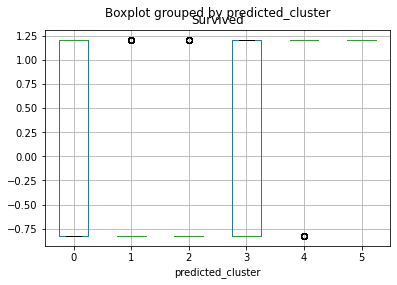

In [97]:
df_scaled.boxplot('Survived',by='predicted_cluster')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


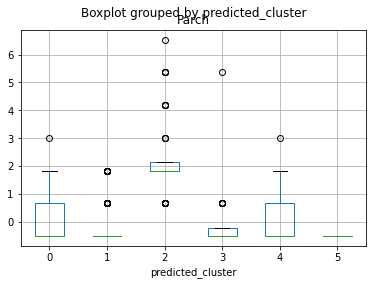

In [98]:
df_scaled.boxplot('Parch',by='predicted_cluster')
plt.show()

## 1.2 In a textbox describe the separation the clustering achieved for each of these features. Are the boxplots overlapping? Which two clusters are the most dissimilar based on these two features. Which are the most similar?

Between the two features, the boxplots are distinctive separation between all clusters. In the 'Survived' boxplot,  most of the data lives in the second and third clusters. The first cluster is most dissimilar from the second cluster while the second and third clusters are the most similar in this feature. In the 'Parch' boxplot, the data points are spread between the 1-5 clusters. The fourth cluster is most dissimilar to the fifth cluster and the first and fifth clusters are most similar.

# Task 5 - PCA

## 1. Fit and transform our scaled data using a PCA object using 3 dimensions on our scaled dataframe.

In [99]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, svd_solver='full')
pca.fit(df_scaled)

PCA(n_components=3, svd_solver='full')

## 2. Save the results in a new dataframe.


In [100]:
pca_comp = pd.DataFrame(pca.components_)
pca_comp.columns = ['PC' + x for x in list(map(str,list(range(1,14))))]

pca_comp.columns = df_scaled.columns
pca_comp

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing,predicted_cluster
0,0.265067,-0.038189,-0.078204,0.100706,0.158800,0.055217,0.436857,-0.436857,-0.170675,0.056136,0.123692,0.064147,0.671099
1,0.295838,-0.364290,0.086794,-0.002777,0.065281,0.370546,0.217577,-0.217577,0.503819,-0.009105,-0.468258,0.049118,-0.245745
2,0.090179,-0.366850,0.545416,-0.504348,-0.410187,0.045936,-0.031448,0.031448,-0.141830,-0.169214,0.188873,0.166919,0.144288


## 3. Explain how many dimensions we have reduced our dataset from. 


We have reduced the dimensions from 15 to only 3.

## 4. Sum up the explained variance and show the total. How much variance in our dataset do only 3 dimensions explain?


In [101]:
np.cumsum(pca.explained_variance_ratio_)

array([0.27165101, 0.47240386, 0.59065037])

In [102]:
sum(pca.explained_variance_ratio_)

0.5906503661735076

The first component shows 34% variance, second shows about 50%, and the rest is 62%. 

# Task 6 - Kmeans with PCA

## 1. Fit a KMeans object to our new reduced PCA dataset



In [103]:
pca_three = PCA(3)
df_scaled_pca = pca_three.fit_transform(df_scaled)

df_scaled_pca = pd.DataFrame(df_scaled_pca)
df_scaled_pca.columns = ['PC' + x for x in list(map(str,list(range(0,3))))]

df_scaled_pca

,PC0,PC1,PC2
0,-1.239518,-1.508782,-0.632111
1,-0.223704,4.085588,-0.011187
2,2.998524,-0.708411,0.547465
3,3.196776,0.528733,1.257933
4,-1.417105,-1.422459,0.399843
...,...,...,...
709,2.663535,0.620094,-3.003536
710,-1.323247,-1.000718,0.541507
711,3.150466,0.274193,1.179521
712,-2.124803,2.823961,0.175498


## 2. Predict the cluster using the new KMeans object



## 3. Save the prediction in a 'predicted_cluster' column


In [104]:
df_scaled_pca['predicted_cluster'] = KMeans(3).fit_predict(df_scaled_pca)
df_scaled_pca

,PC0,PC1,PC2,predicted_cluster
0,-1.239518,-1.508782,-0.632111,0
1,-0.223704,4.085588,-0.011187,2
2,2.998524,-0.708411,0.547465,1
3,3.196776,0.528733,1.257933,1
4,-1.417105,-1.422459,0.399843,0
...,...,...,...,...
709,2.663535,0.620094,-3.003536,1
710,-1.323247,-1.000718,0.541507,0
711,3.150466,0.274193,1.179521,1
712,-2.124803,2.823961,0.175498,2


## 4. Plot Principal Component 1 and 2 using seaborn scatterplot and highlight/hue the predicted cluster



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


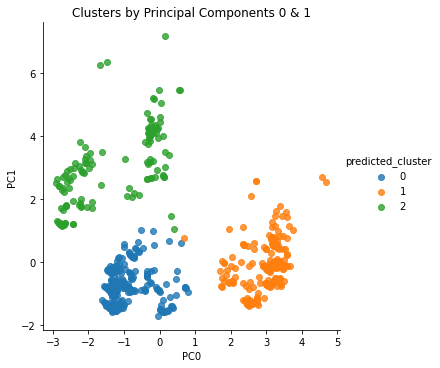

In [105]:
sns.lmplot('PC0', 'PC1', data=df_scaled_pca, hue='predicted_cluster', fit_reg=False)
plt.title('Clusters by Principal Components 0 & 1')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


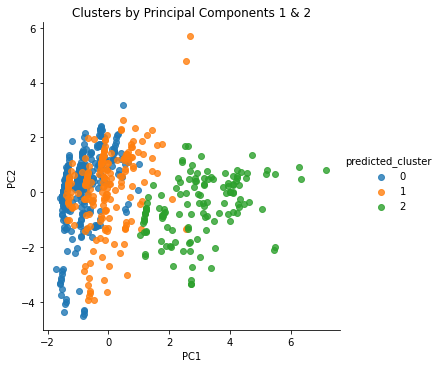

In [106]:
sns.lmplot('PC1', 'PC2', data=df_scaled_pca, hue='predicted_cluster', fit_reg=False)
plt.title('Clusters by Principal Components 1 & 2')
plt.show()

## 5. In a text block explain if using PCA we have been more successful in visualizing the clusters than we were using our best model before applying PCA. Explain your argument well. 


Using PCA is a good option to visualize the clusters by overcoming overfitting. It helps to reduce the number of features thus transforming a high dimensional data to low dimensional, making it easy to visualize.

# Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp "/content/drive/My Drive/Colab Notebooks/A8_Dien_Alex.ipynb" ./

# create html from ipynb
!jupyter nbconvert --to html "A8_Dien_Alex.ipynb"